In [1]:
import numpy as np
import pandas as pd


In [2]:
prices = pd.read_csv('data/sample_prices.csv')

In [3]:
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [4]:
prices.shape

(13, 2)

In [8]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,0.023621,0.039662
1,-0.021807,-0.033638
2,-0.031763,0.082232
3,0.034477,0.044544
4,0.037786,-0.026381
5,-0.011452,-0.049187
6,0.032676,0.117008
7,-0.012581,0.067353
8,0.029581,0.078249
9,0.006151,-0.168261


In [10]:
prices/prices.shift(1)-1

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [12]:
ret = prices.pct_change().dropna()

In [16]:
(ret+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [18]:
(ret+1).cumprod()-1

,BLUE,ORANGE
1,0.023621,0.039662
2,0.001299,0.004690
3,-0.030506,0.087308
4,0.002920,0.135741
5,0.040816,0.105779
6,0.028897,0.051388
7,0.062517,0.174409
8,0.049149,0.253508
9,0.080184,0.351595
10,0.086828,0.124174


In [24]:
deviations = ret - ret.mean()
square_dev = deviations**2
vol = np.sqrt(square_dev.sum()/(ret.shape[0]-1))

In [25]:
vol

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [2]:
me = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [3]:
me.tail()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53
201812,NaN,-14.28,-12.41,-9.76,-14.77,-12.44,-12.22,-11.34,-9.21,-15.31,-13.19,-11.94,-13.13,-12.73,-11.57,-11.87,-10.75,-9.54,-8.90


In [4]:
cols = ['Lo 10', 'Hi 10']
ret = me[cols]
ret.columns = ['small_cap', 'large_cap']

In [5]:
ret.head()

,small_cap,large_cap
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [6]:
ret=ret/100

In [7]:
ret

,small_cap,large_cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


<Axes: >

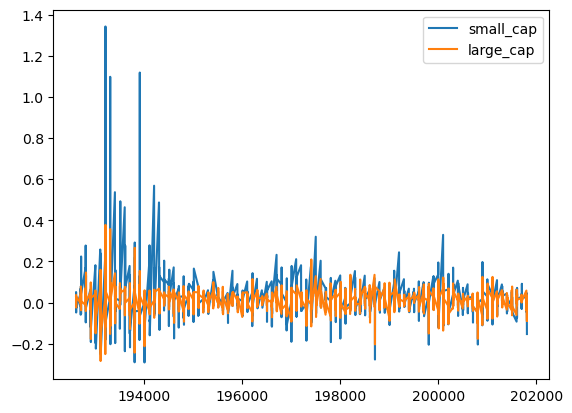

In [8]:
ret.plot()

$$
r_a = (r_{acc} +1)^{12/obs}
$$

$$
v_a = v_{acc}*\sqrt(12)
$$

In [9]:
def annualize_return(rets):
    ret_acc = (1+rets).prod()
    return ret_acc**(12/rets.shape[0]) - 1

In [18]:
annualize_return(ret)

small_cap    0.167463
large_cap    0.092810
dtype: float64

In [19]:
def annualize_vol(rets):
    sdev = rets.std()
    return sdev*np.sqrt(12)

In [22]:
annualize_vol(ret.large_cap)

0.18671598774331255

In [20]:
annualize_vol(ret)

small_cap    0.368193
large_cap    0.186716
dtype: float64

In [13]:
rf = 0
sharpe = (annualize_return(ret)  - rf)/annualize_vol(ret)

In [14]:
sharpe

small_cap    0.454825
large_cap    0.497063
dtype: float64

In [ ]:
def